# FUNCIONES

In [70]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
np.arange(0, 5)

array([0, 1, 2, 3, 4])

In [3]:
#plt.plot(x, y)
print("HOLA")

HOLA


In [9]:
number = 4
number * 2
hola_a_todos()

Hola a todos


In [5]:
# 1. def
# 2. nombre o etiqueta
# 3. parentesis
# 4. OPCIONAL: Pasar parametros dentro de parentesis separados por coma
# 5. Colocar dos puntos
# 6. Bloque de código indentado a la derecha
def hola_a_todos():
    print("Hola a todos")

In [6]:
number

4

In [7]:
hola_a_todos

<function __main__.hola_a_todos()>

In [13]:
hola_a_todos()

Hola a todos


In [11]:
import math
math.pow(2, 4)

16.0

In [14]:
# colocar nombre con verbo 
def obtener_potencia(base, exponente):
    if base > 0 and exponente > 0:
        resultado = base ** exponente
        print(resultado)
    else:
        print(f"La base:{base} o el exponente: {exponente} no son mayores a cero.")

In [18]:
obtener_potencia(0, 5)

La base:0 o el exponente: 5 no son mayores a cero.


In [21]:
obtener_potencia(2, 5)

32


In [22]:
obtener_potencia("4", "5")

TypeError: '>' not supported between instances of 'str' and 'int'

In [54]:
def sumar(a, b):
    if type(a) == int and type(b) == int:
        resultado = a + b
        print(resultado)
    else:
        print("Ingrese numeros correctamente (INT)")
        #raise TypeError("Ingrese numeros correctamente (INT)")

X = sumar(2, 2)
print(X)
# SCOPE
resultado * 2

4
None


NameError: name 'resultado' is not defined

In [42]:
sumar("31", "23")

Ingrese numeros correctamente (INT)


In [56]:
def sumar(a, b):
    if type(a) == int and type(b) == int:
        resultado = a + b
        # ESCRIBO LA PALABRA return
        # dejar espacio y escribir el valor que voy a devolver
        return resultado 
    else:
        print("Ingrese numeros correctamente (INT)")
        #raise TypeError("Ingrese numeros correctamente (INT)")

In [58]:
number1 = 2
number2 = 3

resultado_de_suma = sumar(number1, number2)
np.arange(0, resultado_de_suma + 1)

array([0, 1, 2, 3, 4, 5])

In [61]:
# cargas en kN
P = 700
Q = 50
R = 150
# metros
L = 2.5
# dimensiones seccion en mm
b = 400
h = 300
t = 5
# simbolo de posicion de longitud (m)
x = sp.symbols('x')
x

x

In [67]:
A = b * t + (h - t) * t
centroide = (b * t * (h - t / 2) + (h - t) * t * (h - t) / 2) / A
# mm4
Iy = b ** 3 * t / 12 + (h - t) * t ** 3 / 12
# mm4
Iz = b * t ** 3 / 12 + (h - t) ** 3 * t / 12 + b * t * ((h - t / 2) - centroide) ** 2 + (h - t) * t * ((h - t) / 2 - centroide) ** 2
centroide, Iy, Iz

(233.83093525179856, 26669739.583333336, 29801709.007793766)

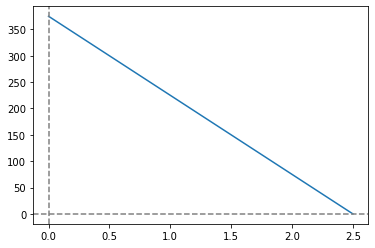

In [76]:
# PLANO X - Y
cortante = -R
momento_reaccion = -R * L
momento_tramo_1 = -momento_reaccion + sp.integrate(cortante, x)

x_array = np.arange(0, L + 0.05, 0.05)
y = sp.lambdify(x, momento_tramo_1)(x_array)
plt.plot(x_array, y)
plt.axhline(0, color="gray", linestyle='--')
plt.axvline(0, color="gray", linestyle='--')

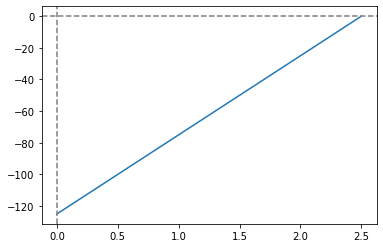

In [80]:
# PLANO X - Z
cortante = Q
momento_reaccion = Q * L
momento_tramo_2 = -momento_reaccion + sp.integrate(cortante, x)

y = sp.lambdify(x, momento_tramo_2)(x_array)
plt.plot(x_array, y)
plt.axhline(0, color="gray", linestyle='--')
plt.axvline(0, color="gray", linestyle='--')

In [81]:
def obtener_esfuerzos_seccion(valor_x, y, z):
    # MPa
    compresion = - P * 10 ** 3 / A
    My = momento_tramo_2.subs(x, valor_x)
    Mz = momento_tramo_1.subs(x, valor_x)
    return compresion + My * 10 ** 6 * z / Iy - Mz * 10 ** 6 * y / Iz

In [83]:
# MPa
obtener_esfuerzos_seccion(0, h - centroide, b / 2)

-1971.44748458559

In [85]:
obtener_esfuerzos_seccion(0, h - centroide, -b / 2)

-96.6635241435310

In [87]:
obtener_esfuerzos_seccion(0, - centroide, -t / 2)

2752.61318997936

In [89]:
obtener_esfuerzos_seccion(0, h - centroide, np.arange(-b / 2, b / 2 + 0.5, 0.5))

array([-96.6635241435310, -99.0070040940836, -101.350484044636,
       -103.693963995189, -106.037443945741, -108.380923896294,
       -110.724403846846, -113.067883797399, -115.411363747952,
       -117.754843698504, -120.098323649057, -122.441803599609,
       -124.785283550162, -127.128763500715, -129.472243451267,
       -131.815723401820, -134.159203352372, -136.502683302925,
       -138.846163253477, -141.189643204030, -143.533123154583,
       -145.876603105135, -148.220083055688, -150.563563006240,
       -152.907042956793, -155.250522907345, -157.594002857898,
       -159.937482808451, -162.280962759003, -164.624442709556,
       -166.967922660108, -169.311402610661, -171.654882561213,
       -173.998362511766, -176.341842462318, -178.685322412871,
       -181.028802363424, -183.372282313976, -185.715762264529,
       -188.059242215081, -190.402722165634, -192.746202116187,
       -195.089682066739, -197.433162017292, -199.776641967844,
       -202.120121918397, -204.463601868

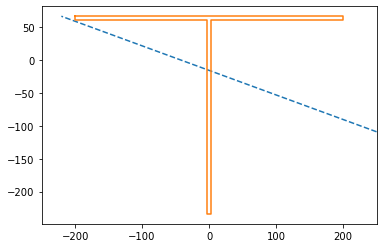

In [96]:
# eje neutro
def graficar_eje_neutro(valor_x):
    if valor_x < L:
        y_neutro = np.arange(-centroide, h - centroide + 0.5, 0.5)
        z_neutro = (P * 10 ** 3 / A + float(momento_tramo_1.subs(x, valor_x)) * 10 ** 6 * y_neutro / Iz) * (Iy / (float(momento_tramo_2.subs(x, valor_x)) * 10 ** 6))
        plt.plot(z_neutro, y_neutro, linestyle="--")
    else:
        plt.title("Toda la sección se somete a esfuerzo")
    plt.plot([-b / 2, b / 2, b / 2, t / 2, t / 2, - t / 2, -t / 2, -b / 2, -b / 2], [h - centroide, h - centroide, h - centroide - t, h - centroide - t, -centroide, -centroide, h - centroide - t, h - centroide - t, h - centroide])
    plt.xlim([-b / 2  - 50, b / 2 + 50])

graficar_eje_neutro(0)